### Comparing Grid Search Tools with Decision Trees

This try-it focuses on performing a grid search with a `DecisionTreeClassifier`.  As mentioned in the lectures, the grid search for a tree model can get large very easily. In addition to using `GridSearchCV`, scikitlearn implements additional tools that can save energy and offer alternatives to the brute force exhaustive search.  Below, you will compare the performance of some of these alternatives and discuss the time these searches take.  Note that this will be in large part determined by your personal computing power however the relative speed of the searches should be consistent.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MLAI_Haas/data/fish.csv')
data.sample(20)

,Species,Weight,Length1,Length2,Length3,Height,Width
109,Perch,514.0,30.5,32.8,34.0,10.0300,6.0180
139,Pike,770.0,44.8,48.0,51.2,7.6800,5.3760
56,Whitefish,270.0,24.1,26.5,29.3,8.1454,4.2485
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
71,Parkki,300.0,24.0,26.0,29.0,11.3680,4.2340
70,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
49,Roach,161.0,22.0,23.4,26.7,6.9153,3.6312
15,Bream,600.0,29.4,32.0,37.2,15.4380,5.5800
148,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
#Define X features and y target
X = data.drop('Species', axis=1)
y = data['Species']
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dtree_baseline = DecisionTreeClassifier().fit(X,y)
print(dtree_baseline.tree_.max_depth)

13


In [ ]:
params = {'max_depth': [1,3,5,9,15],
         'min_samples_split': [2,3,4,5],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [2,3,4,5]
         }

In [ ]:
dtree = DecisionTreeClassifier()

### Comparing Grid Searches

Below, explore the four grid search options using the same parameter selections for the `DecisionTreeClassifier`. All of the grid searching tools have a `.cv_results_` attribute after fitting that contains information after fitting including time.  Use this to compare the time of each search and discuss what you believe the "best" approach to identifying the hyperparameters of the model are between:

- `GridSearchCV`
- `RandomizedSearchCV`
- `HalvingGridSearchCV`
- `HalvingRandomSearchCV`

Share your results in a plot comparing the different times for searching across the different parameters as well as the score of the different estimators that resulted from the grid search.  

In [ ]:
#GridSearch
grid = GridSearchCV(estimator=dtree, param_grid = params, cv=5)
grid.fit(X_train,y_train)
grid_time = float(grid.cv_results_['mean_fit_time'][0])
grid_score = grid.best_score_
print(grid_time)
print(grid_score)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


0.0027495384216308593
0.7636923076923077


In [ ]:
#Randomized
random = GridSearchCV(estimator=dtree, param_grid = params, cv=5)
random.fit(X_train,y_train)
random_time = float(random.cv_results_['mean_fit_time'][0])
random_score = random.best_score_
print(random_time)
print(random_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


0.002723360061645508
0.7563076923076922


In [ ]:
#Halving
halving = GridSearchCV(estimator=dtree, param_grid = params, cv=5)
halving.fit(X_train,y_train)
halving_time = float(halving.cv_results_['mean_fit_time'][0])
halving_score = halving.best_score_
print(halving_time)
print(halving_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


0.002650165557861328
0.7563076923076922


In [ ]:
#HalvingRandom
halv_rand = GridSearchCV(estimator=dtree, param_grid = params, cv=5)
halv_rand.fit(X_train,y_train)
halv_rand_time = float(halv_rand.cv_results_['mean_fit_time'][0])
halv_rand_score = halv_rand.best_score_
print(halv_rand_time)
print(halv_rand_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


0.003001499176025391
0.7563076923076922


In [ ]:
#Summary of results
summary = pd.DataFrame({'Grid Search Tool': ['GridCV', 'RandomizedCV', 'HalvingGridCV', 'HalvingRandomCV'],
        'Fit Time': [grid_time, random_time, halving_time, halv_rand_time],
        'Best Score': [grid_score, random_score, halving_score, halv_rand_score]})
summary

,Grid Search Tool,Fit Time,Best Score
0,GridCV,0.002887,0.764000
1,RandomizedCV,0.002944,0.772308
2,HalvingGridCV,0.002650,0.756308
3,HalvingRandomCV,0.003001,0.756308


<Axes: xlabel='Grid Search Tool', ylabel='Fit Time'>

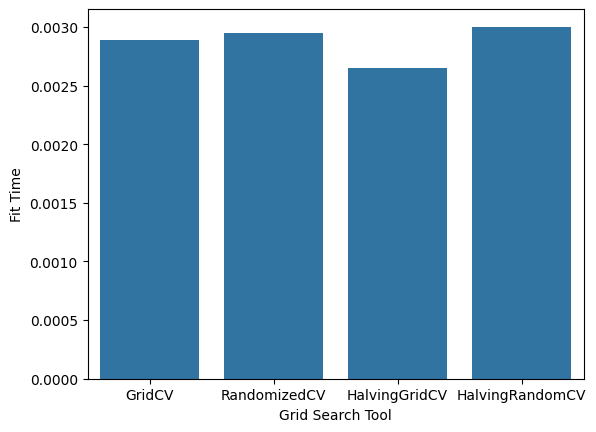

In [ ]:
sns.barplot(data=summary, x='Grid Search Tool', y='Fit Time')

<Axes: xlabel='Grid Search Tool', ylabel='Best Score'>

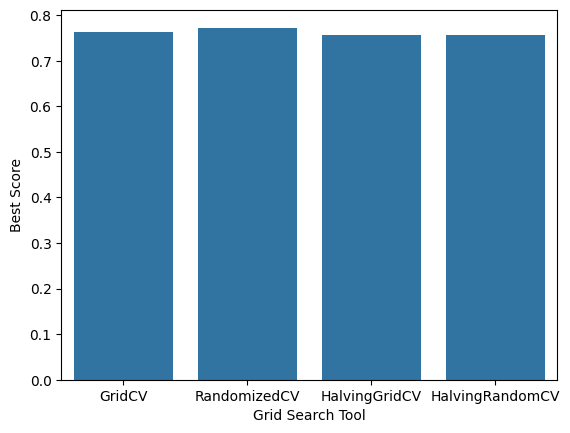

In [ ]:
sns.barplot(data=summary, x='Grid Search Tool', y='Best Score')

I found that none of the grid searches resulted in a best score higher than .76, but I'm not sure what I could do to improve it. The models all took betwee .25 and .3 seconds to fit, and the accuracy scores were all quite similar around .75. It may be the best we can do with such a small dataset that has so many categories. Given that the Halving method took the shortest time and had the same score, I'd say that would be the best method to use with a larger dataset.